# Sentiment Analysis of User Reviews

## Problem Statement
In an effort to enhance customer satisfaction and product development, this section of our project aims to implement advanced natural language processing techniques to perform a fine-grained sentiment analysis on user reviews for recipes. While ratings provide a broad indication of satisfaction, they fail to capture the depth and nuances of customer emotions. This analysis seeks to discern detailed emotions embedded in the reviews, such as distinguishing between 'warm and happy' versus 'excited and happy'. These insights will enable the company to categorize recipes and ingredients more effectively, tailoring offerings to better meet customer expectations and enhance engagement.

## Justification
The proposed approach leverages both machine learning and deep learning models to provide a comprehensive analysis of customer sentiments. This dual approach allows for more accurate and nuanced detection of sentiments than traditional methods, making it possible to obtain actionable insights that can directly influence product strategies and marketing decisions.


#Lodaing data

## Understanding the data

Before diving into sentiment analysis, we need to load and examine the dataset to understand the structure and quality of the data we have. This step is crucial as it helps identify any preliminary data cleaning and preprocessing needs.


In [1]:
import pandas as pd

# Let's Load the dataset
data_path = '/content/reviews.csv'
reviews_df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(reviews_df.head())

# Display the dataframe's information to understand the data types and check for missing values
print(reviews_df.info())


   ReviewId  RecipeId  AuthorId        AuthorName  Rating  \
0         2       992      2008         gayg msft       5   
1         7      4384      1634     Bill Hilbrich       4   
2         9      4523      2046  Gay Gilmore ckpt       2   
3        13      7435      1773     Malarkey Test       5   
4        14        44      2085        Tony Small       5   

                                              Review         DateSubmitted  \
0       better than any you can get at a restaurant!  2000-01-25T21:44:00Z   
1  I cut back on the mayo, and made up the differ...  2001-10-17T16:49:59Z   
2  i think i did something wrong because i could ...  2000-02-25T09:00:00Z   
3  easily the best i have ever had.  juicy flavor...  2000-03-13T21:15:00Z   
4                                 An excellent dish.  2000-03-28T12:51:00Z   

           DateModified  
0  2000-01-25T21:44:00Z  
1  2001-10-17T16:49:59Z  
2  2000-02-25T09:00:00Z  
3  2000-03-13T21:15:00Z  
4  2000-03-28T12:51:00Z  
<class '

## Initial Observations

- **Data Overview**: The dataset contains 1,401,982 entries, each representing a user review for a recipe. The columns include `ReviewId`, `RecipeId`, `AuthorId`, `AuthorName`, `Rating`, `Review`, `DateSubmitted`, and `DateModified`. This extensive dataset will allow us to perform a detailed sentiment analysis by correlating textual reviews with ratings and other metadata.

- **Data Quality**:
  - All columns have a large number of non-null entries, indicating minimal missing data across most fields.
  - The `Review` column has **214** missing entries (*1,401,768* non-null out of *1,401,982* total based on the numbers shown above).
  We will need to decide how to handle these missing reviews, whether by removal or imputation, in this case since its such a small percentage of our over data set we might lean towards removal.
  - The data types are appropriate for the information contained in each column. However, the `DateSubmitted` and `DateModified` columns, currently read as objects, may need conversion to datetime format for any time-series analysis or features related to time.

- **Potential Challenges**:
  - Handling missing reviews in the `Review` column is essential since our analysis heavily depends on textual data.
  - Parsing and converting the dates could uncover trends over time or detect changes in sentiment or rating behavior based on the submission or modification dates but that is note a primay goal of this section of the proejct, although it could be somthing to look at in the future.



## Enhanced Exploratory Data Analysis (EDA)

To better understand the nuances of our dataset and to aid in the development of our sentiment analysis model, we'll perform an in-depth exploration of the data. This will include analyzing the distribution of ratings, the length of reviews, and any patterns or trends that could influence sentiment analysis.


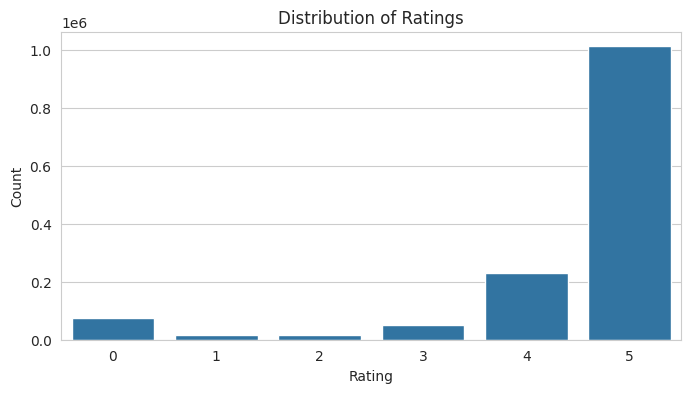

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', data=reviews_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## Ratings Distribution Analysis

The distribution of ratings in the dataset is heavily skewed towards higher ratings, with a significant majority of reviews rated as '5'. This skew indicates that users are generally satisfied with the recipes, or that users are more likely to leave a review when they have a positive experience.

### Implications for Model Training
- **Model Bias towards Positive Sentiments**: Given the high number of positive ratings, our sentiment analysis model might develop a bias towards positive sentiments. This could lead to higher accuracy in predicting positive sentiments but lower sensitivity towards negative or neutral sentiments.
- **Data Balancing**: To mitigate this, we may need to consider techniques such as resampling or using stratified splits during training to ensure that our model does not overlook the less frequent but equally important negative sentiments.


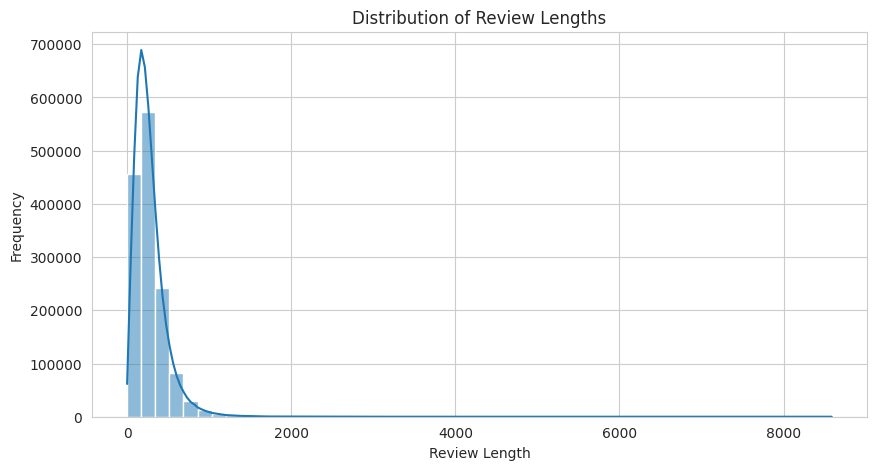

In [3]:
# Calculate the length of each review, handling non-string values
reviews_df['ReviewLength'] = reviews_df['Review'].apply(lambda x: len(str(x)) if not isinstance(x, float) else 0)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(reviews_df['ReviewLength'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## Review Length Distribution Analysis

The histogram of review lengths shows that most reviews are relatively short, with the majority having fewer than 500 characters. The distribution has a long tail, suggesting a few reviews are much lengthier.

### Implications for Feature Engineering
- **Text Preprocessing**: The variance in review lengths will require careful text preprocessing to normalize the data for modeling. This may include padding shorter reviews or truncating longer ones to standardize input lengths for deep learning models.
- **Feature Extraction**: Shorter reviews might lack sufficient contextual data for accurate sentiment analysis. We might need to extract more nuanced features, such as sentiment-specific keywords or phrases, to enhance model performance.


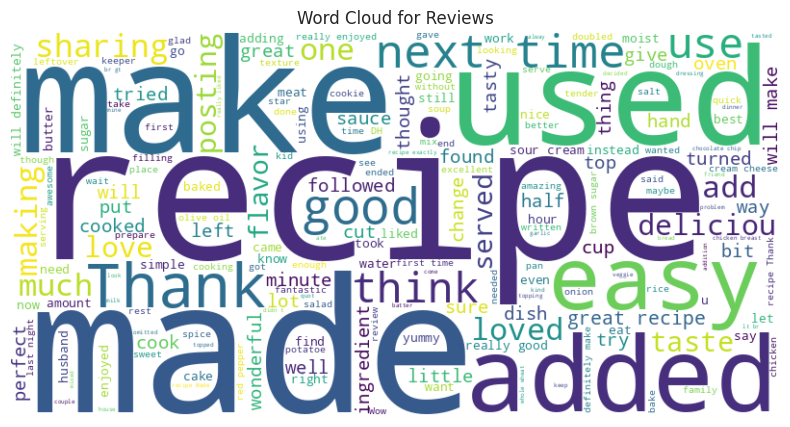

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(reviews_df['Review']))

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Reviews')
plt.show()


## Word Cloud Analysis

The word cloud highlights frequent terms in the reviews such as 'good', 'great', 'easy', and 'delicious', suggesting positive sentiments dominate the textual data. Words like 'love', 'best', and 'perfect' also appear prominently, reinforcing the positive skew observed in the ratings distribution.

### Implications for Sentiment Analysis
- **Dominant Positive Sentiments**: The prevalence of positive words will influence the sentiment analysis model to detect positive emotions more effectively. However, it may also require more sophisticated techniques to accurately capture less frequent negative or neutral sentiments.
- **Lexicl Analysis**: The common words can be used to refine the sentiment lexicon, aiding in more accurate sentiment classification. This can be particularly useful in enhancing the granularity of sentiment analysis to detect variations within positive sentiments as mentioned in our project goals.

Based on these observations we will move on to our next steps; data preparation, including cleaning and structuring the data for our sentiment analysis model.


## Data Preparation

This section focuses on preparing the data for analysis. We will clean the data by addressing missing values and converting data types where necessary. These steps are critical to ensure the accuracy and effectiveness of our modeling process.
As mentioned earler our approch to cleaing the missing values will be to remove them as they constitute a very small amount of our over review data. This will ensure that we have uniform data for our modeling

In [4]:
# Handling missing values in the 'Review' column
reviews_df.dropna(subset=['Review'], inplace=True)

# Converting 'DateSubmitted' and 'DateModified' to datetime format
reviews_df['DateSubmitted'] = pd.to_datetime(reviews_df['DateSubmitted'])
reviews_df['DateModified'] = pd.to_datetime(reviews_df['DateModified'])

# Display the updated dataframe information to confirm changes
print(reviews_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1401768 entries, 0 to 1401981
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401768 non-null  int64              
 1   RecipeId       1401768 non-null  int64              
 2   AuthorId       1401768 non-null  int64              
 3   AuthorName     1401768 non-null  object             
 4   Rating         1401768 non-null  int64              
 5   Review         1401768 non-null  object             
 6   DateSubmitted  1401768 non-null  datetime64[ns, UTC]
 7   DateModified   1401768 non-null  datetime64[ns, UTC]
 8   ReviewLength   1401768 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(5), object(2)
memory usage: 106.9+ MB
None


## Post-Cleanup Observations

- **Missing Values**: All missing reviews have been removed, ensuring our dataset only contains complete entries for analysis.
- **Data Type Conversion**: The date columns have been successfully converted to datetime objects, allowing us to perform any time-based analysis or feature engineering in the future.


## Text Normalization

Text normalization is a crucial step in preparing text data for NLP tasks. It involves converting all text to lowercase to ensure uniformity, removing punctuation, and excluding numbers which might not be relevant for our sentiment analysis. This process helps in reducing the complexity of the text data and improves the performance of the modeling.


In [5]:
import re

# Function to normalize text
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

# Apply normalization to the Review column
reviews_df['NormalizedReview'] = reviews_df['Review'].apply(normalize_text)

# Display the first few normalized reviews
print(reviews_df[['Review', 'NormalizedReview']].head())


                                              Review  \
0       better than any you can get at a restaurant!   
1  I cut back on the mayo, and made up the differ...   
2  i think i did something wrong because i could ...   
3  easily the best i have ever had.  juicy flavor...   
4                                 An excellent dish.   

                                    NormalizedReview  
0        better than any you can get at a restaurant  
1  i cut back on the mayo and made up the differe...  
2  i think i did something wrong because i could ...  
3  easily the best i have ever had  juicy flavorf...  
4                                  an excellent dish  


Based on the responses above we can see that the "!" has been removed from the first response and the "." as been removed from the third response. We can slos see that All the capitlaitsed letters have been converted to smaller case.

In [6]:
# Display the updated dataframe information to confirm changes
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1401768 entries, 0 to 1401981
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   ReviewId          1401768 non-null  int64              
 1   RecipeId          1401768 non-null  int64              
 2   AuthorId          1401768 non-null  int64              
 3   AuthorName        1401768 non-null  object             
 4   Rating            1401768 non-null  int64              
 5   Review            1401768 non-null  object             
 6   DateSubmitted     1401768 non-null  datetime64[ns, UTC]
 7   DateModified      1401768 non-null  datetime64[ns, UTC]
 8   ReviewLength      1401768 non-null  int64              
 9   NormalizedReview  1401768 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(5), object(3)
memory usage: 117.6+ MB
None


## Data Type Conversion for Textual Columns

To ensure consistency in text processing operations, we will explicitly convert the columns that contain textual data (`AuthorName`, `Review`, and `NormalizedReview`) to string data type. This step is beneficial for avoiding any data type-related errors during text manipulation tasks such as normalization and lemmatization.


In [7]:
# Convert textual columns to string data type
reviews_df['AuthorName'] = reviews_df['AuthorName'].astype(str)
reviews_df['Review'] = reviews_df['Review'].astype(str)
reviews_df['NormalizedReview'] = reviews_df['NormalizedReview'].astype(str)

# Display the data types to confirm changes
print(reviews_df.dtypes)


ReviewId                          int64
RecipeId                          int64
AuthorId                          int64
AuthorName                       object
Rating                            int64
Review                           object
DateSubmitted       datetime64[ns, UTC]
DateModified        datetime64[ns, UTC]
ReviewLength                      int64
NormalizedReview                 object
dtype: object


## Lemmatization over Stemming

Lemmatization is a text preprocessing technique that reduces words to their base or root form. Unlike stemming, lemmatization considers the context and converts the word to its meaningful base form. This is particularly useful in sentiment analysis as it helps in maintaining the semantic context of the text, which can be crucial for accurately interpreting the sentiment.


In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm.notebook import tqdm

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Load English stop words
stop_words = set(stopwords.words('english'))

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()
    # Lemmatize words not in stop words list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)

# Apply the function to the normalized reviews with progress bar
tqdm.pandas(desc="Lemmatizing reviews")
reviews_df['LemmatizedReview'] = reviews_df['NormalizedReview'].progress_apply(lemmatize_text)

# Display the first few lemmatized reviews
print(reviews_df[['NormalizedReview', 'LemmatizedReview']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatizing reviews:   0%|          | 0/1401768 [00:00<?, ?it/s]

                                    NormalizedReview  \
0        better than any you can get at a restaurant   
1  i cut back on the mayo and made up the differe...   
2  i think i did something wrong because i could ...   
3  easily the best i have ever had  juicy flavorf...   
4                                  an excellent dish   

                                    LemmatizedReview  
0                              better get restaurant  
1  cut back mayo made difference sour cream adjus...  
2  think something wrong could taste cornstarch f...  
3  easily best ever juicy flavorful dry vegetable...  
4                                     excellent dish  


# Implementing Feature Engineering



## Sentiment Scores Using VADER

Valence Aware Dictionary and sEntiment Reasoner is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is very useful for our case as it provides a compound score that denotes the overall sentiment polarity ranging from negative to positive.


In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment compound score
def get_sentiment_score(review):
    return sia.polarity_scores(review)['compound']

# Apply the function to the lemmatized reviews
reviews_df['SentimentScore'] = reviews_df['LemmatizedReview'].apply(get_sentiment_score)

# Display the first few sentiment scores
print(reviews_df[['LemmatizedReview', 'SentimentScore']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                    LemmatizedReview  SentimentScore
0                              better get restaurant          0.4404
1  cut back mayo made difference sour cream adjus...         -0.2732
2  think something wrong could taste cornstarch f...         -0.4767
3  easily best ever juicy flavorful dry vegetable...          0.8271
4                                     excellent dish          0.5719


We can see from the results that we new have a new feature that provides us with more information on the sentament of the users review.

## Word Count of Reviews

Next we look at the length of the review in terms of word count which can be an indicator of the sentiment's strength. Longer reviews might provide more content and context, which can be particularly useful in understanding the depth of the user's sentiment.


In [10]:
# Calculate word counts in lemmatized reviews
reviews_df['WordCount'] = reviews_df['LemmatizedReview'].apply(lambda x: len(x.split()))

# Display the first few word counts
print(reviews_df[['LemmatizedReview', 'WordCount']].head())


                                    LemmatizedReview  WordCount
0                              better get restaurant          3
1  cut back mayo made difference sour cream adjus...         10
2  think something wrong could taste cornstarch f...          8
3  easily best ever juicy flavorful dry vegetable...         11
4                                     excellent dish          2


## Emotion Detection Using Hugging Face Transformers:  TinyBERT for Faster Emotion Detection

Lastly we'll do an emotion analysis using an existing pre-tined model from the Bert class of foundation models

### Model Description
TinyBERT is significantly smaller and faster compared to the original BERT model, being 7.5 times smaller and 9.4 times faster on inference. This makes TinyBERT particularly suited for scenarios where speed is a priority (We tried using a larger DistilBERT with an accurcy of around 97% but for our data set of 1.4M reccords, that process was going to take about 8hrs on a A100 so we decided to pivot). Although it sacrifices a bit of accuracy for speed, with an accuracy of 93.54% on the emotion balanced dataset, it remains highly effective for emotion detection in large datasets.

### Intended Uses & Limitations
TinyBERT is designed for quick inference, making it ideal for real-time applications or processing large volumes of data where speed is crucial. It is important to note, however, that it might not capture the full complexity of some sentences due to its simplified architecture, which could lead to occasional misinterpretations.

### Model Performance
- **Loss**: 0.1809
- **Accuracy**: 93.54%
- **Dataset Size**: Trained on 89,754 examples, with balanced labels across train, validation, and test splits.

This model is well-suited for our project's need to process over a million reviews efficiently while still providing a robust analysis of emotions.


In [11]:
from transformers import pipeline
from tqdm.auto import tqdm

# Initialize the pipeline with the model and its associated tokenizer
emotion_classifier = pipeline('text-classification', model='AdamCodd/tinybert-emotion-balanced', truncation=True, padding=True, max_length=512)

# Define a function to classify emotions using the pipeline
def classify_emotions(text):
    # Ensure text is a string
    text = str(text)
    # Classify emotion with truncation to 512 tokens to match typical BERT-like models max length
    result = emotion_classifier(text, truncation=True, max_length=512)
    return result[0]['label']

# Apply the emotion detection to the dataset with progress tracking
batch_size = 100  # Adjust batch size based on computational resources
results = []

# Using tqdm to show progress
for i in tqdm(range(0, len(reviews_df['LemmatizedReview']), batch_size), desc="Classifying Emotions"):
    batch = reviews_df['LemmatizedReview'][i:i+batch_size].tolist()
    batch_results = [classify_emotions(review) for review in batch]
    results.extend(batch_results)

# Add the results to the DataFrame
reviews_df['Emotion'] = results

# Display some of the classified emotions
print(reviews_df[['LemmatizedReview', 'Emotion']].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Classifying Emotions:   0%|          | 0/14018 [00:00<?, ?it/s]

                                    LemmatizedReview  Emotion
0                              better get restaurant      joy
1  cut back mayo made difference sour cream adjus...  sadness
2  think something wrong could taste cornstarch f...    anger
3  easily best ever juicy flavorful dry vegetable...      joy
4                                     excellent dish      joy


## Analysis of Emotion Detection Results

The application of the TinyBERT model for emotion detection in our dataset has yielded the classifications shown above:

### Key Takeaways

- The model effectively identifies a variety of emotions from the review texts, aligning them with the sentiments that one would expect given the content of the reviews. For example, a review expressing dissatisfaction or issues with a recipe (like tasting cornstarch) is classified as 'Anger'.
- Positive reviews often use words like "best," "excellent," and "perfect," which the model accurately categorizes as 'Joy'.
- The versatility in emotion detection, even in shorter snippets of text, underscores the utility of TinyBERT for rapid and effective sentiment analysis across large datasets.

### Implications for Business Strategy

- **Product Development**: Understanding the specific emotions associated with customer feedback can guide improvements in recipe formulation and presentation. Emotional insights allow more nuanced adjustments compared to simple satisfaction ratings.
- **Marketing and Customer Engagement**: Identifying the emotional tone of reviews helps tailor marketing strategies to enhance positive emotional responses and address areas leading to negative feedback.

This fine-grained emotional analysis will help inform strategic decisions, enhancing customer satisfaction and engagement through targeted adjustments to recipes and marketing techniques.


##**Technique for Identifying Emotionally Significant Words**

**TF-IDF Analysis**: This method will help us identify words that are frequently used in reviews but are rare across all documents (our full reviews dataset), which often indicates that such words carry more meaning or emotional weight. It also has the added benfit of filtering out common words that might not contribute to sentiment differentiation, thereby focusing on more meaningful terms.

**Sentiment and Emotion Co-occurrence**: Analyze words that frequently appear in reviews with strong sentiment scores or specific emotions (like joy or sadness) to determine which words are likely to be associated with particular emotional states.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to the top 1000 features for simplicity

# Fit and transform the lemmatized reviews
tfidf_matrix = vectorizer.fit_transform(reviews_df['LemmatizedReview'])

# Get feature names to use as dataframe columns
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


In [13]:
# Function to find top N words with the highest TF-IDF scores in each document
def top_tfidf_words(row, top_n=5):
    top_words = row.sort_values(ascending=False).head(top_n).index.tolist()
    return top_words

# Apply the function to the TF-IDF DataFrame
reviews_df['TopEmotionalWords'] = tfidf_df.apply(top_tfidf_words, axis=1)

# Display the reviews with their top TF-IDF words
print(reviews_df[['LemmatizedReview', 'TopEmotionalWords']].head())


                                    LemmatizedReview  \
0                              better get restaurant   
1  cut back mayo made difference sour cream adjus...   
2  think something wrong could taste cornstarch f...   
3  easily best ever juicy flavorful dry vegetable...   
4                                     excellent dish   

                                   TopEmotionalWords  
0            [restaurant, better, get, putting, put]  
1                [mayo, difference, dip, sour, back]  
2  [product, cornstarch, finished, wrong, something]  
3       [juicy, easily, bland, vegetable, flavorful]  
4  [excellent, dish, prepare, prepared, presentat...  


### Considered Approach for Expanding Feature Set with Binary Word Features

### Potential Next Steps
Following the identification of top emotionally significant words through TF-IDF analysis, the next logical step would have been to create binary features for each unique word found in the `TopEmotionalWords` across all reviews. This would involve adding a new column for each unique word to our dataset, where each column would indicate the presence or absence of that word in each review.

### Expected Expansion and Computational Considerations
- **Number of New Columns**: The number of new columns would directly correspond to the number of unique words identified. If, for example, we identified 100 unique words across all reviews, this approach would result in the addition of 100 new binary feature columns to the DataFrame.
- **Impact on Dimensionality**: Such an increase in dimensionality could significantly complicate the dataset, raising both the computational costs and the complexity of the model training process. Handling a large number of features often requires more memory and processing power and could lead to longer training times and challenges in model optimization.

### Caveats with the Approach
- **Overfitting**: With a high number of features, especially in a dataset not substantially large, there is a risk of overfitting, where the model becomes very well attuned to the training data but performs poorly on unseen data.
- **Interpretability**: Adding a large number of features can sometimes reduce the interpretability of the model, making it harder to understand which features are truly impactful in predicting sentiments.
- **Resource Intensity**: The computational demand for processing and modeling with a significantly larger number of features could exceed the capabilities of standard computational resources, especially for users without access to high-performance computing environments.

### Decision to Postpone Implementation
Given the potential for increased complexity and computational demands, we decided not to implement this extensive feature expansion in the current phase of the project. The primary concern was that the additional computational resources and time required might not justify the potential gains in model performance at this stage.

### Future Enhancements
- **Gradual Integration**: In future phases of the project, we could consider gradually integrating these features, possibly starting with a subset of the most predictive words identified through more detailed statistical analysis.
- **Advanced Dimensionality Reduction**: Before adding these features, applying advanced dimensionality reduction techniques could help manage the feature space more effectively.
- **Enhanced Computing Resources**: Leveraging better computing infrastructure, such as cloud computing platforms or specialized hardware, could make the handling of increased dimensionality feasible.

This cautious approach ensures that we maintain a balance between model complexity, performance, and computational efficiency, with an eye toward scalable enhancements in future iterations of the project.


## Introduction of Interaction Feature: Sentiment Score and Word Count

### Purpose of the Interaction Feature
In sentiment analysis,**understanding the relationship between the length of the text and the intensity of sentiment** expressed can provide deeper insights into user behavior and sentiment trends. To capture this dynamic, we introduce an interaction feature between the word count of a review and its sentiment score.

### Implementation of the Interaction Feature
We create a new feature by multiplying the `WordCount` of each review by its `SentimentScore`. This interaction feature, named `Sentiment_WordCount_Interaction`, aims to capture how the expressed sentiment intensity might scale with the length of the review.

### Expected Enhancement in Model Performance
- **Capturing Non-linear Relationships**: This feature helps the model capture potential non-linear relationships between the text's length and the intensity of sentiment. For instance, longer reviews might not only express more detailed sentiments but could amplify the positivity or negativity due to the additional context provided.
- **Improving Predictive Accuracy**: By incorporating the interaction between these two features, the model can better predict sentiments for reviews where the length significantly impacts the sentiment's expression. This might be particularly useful in distinguishing between reviews that are lengthy with moderate sentiment and those that are expressive and emotionally charged.
- **Enhanced Nuance in Analysis**: The interaction feature allows the model to differentiate reviews based on how word count influences sentiment expression, adding a layer of depth to the analysis, which can be crucial for fine-grained sentiment analysis tasks.

### Implementation
Below is the  code to create this interaction feature within our dataset. This code multiplies each review's word count by its sentiment score, adding this new feature to our DataFrame, which we will subsequently use in our sentiment analysis model.


In [14]:
# Creating an interaction feature between 'WordCount' and 'SentimentScore'
reviews_df['Sentiment_WordCount_Interaction'] = reviews_df['WordCount'] * reviews_df['SentimentScore']

# Examine the first few rows to see how this new feature looks
print(reviews_df[['WordCount', 'SentimentScore', 'Sentiment_WordCount_Interaction']].head())


   WordCount  SentimentScore  Sentiment_WordCount_Interaction
0          3          0.4404                           1.3212
1         10         -0.2732                          -2.7320
2          8         -0.4767                          -3.8136
3         11          0.8271                           9.0981
4          2          0.5719                           1.1438


# Feature Selection

Feature selection is a critical step in the modeling process as it involves identifying the most informative and relevant features that contribute to the predictive performance of the model. In our sentiment analysis task, the choice of features directly impacts the ability to accurately classify and understand the sentiments and emotions expressed in user reviews.


### Comprehensive Feature Selection for Sentiment Analysis

As we refine our approach to sentiment analysis, it's crucial to ensure our sentiment analysis model captures a broad spectrum of insights from the reviews. We have carefully selected and engineered a set of features that balance computational efficiency with analytical depth. The selected features are designed to uncover the nuances in sentiment and emotional expression in user reviews, supporting our objective to enhance customer satisfaction and product development.

#### Selected Features Overview

1. **Sentiment Scores**:
   - **Description**: Quantitative measures obtained from VADER that provide a compound score indicating the overall sentiment polarity of the reviews.
   - **Purpose**: These scores form the backbone of our sentiment analysis, offering a direct and computationally efficient measure of sentiment polarity.

2. **Emotion Labels**:
   - **Description**: Categories such as joy, sadness, anger, etc., derived from the TinyBERT model.
   - **Purpose**: These labels enable the model to perform fine-grained analysis of the emotional content of the reviews, which is critical for distinguishing detailed emotional states.

3. **Top Emotional Words (TF-IDF)**:
   - **Description**: Words identified through TF-IDF analysis that carry significant emotional or thematic weight.
   - **Purpose**: By focusing on these top words, we capture key emotional triggers in the reviews without introducing excessive computational complexity.

4. **Word Count**:
   - **Description**: The total number of words in each review.
   - **Purpose**: Provides insights into the depth of expression in the review, with longer reviews often indicating more detailed and elaborate sentiment expression.

5. **Sentiment Word Count Interaction**:
   - **Description**: An interaction feature created by multiplying the word count of each review by its sentiment score.
   - **Purpose**: This feature aims to capture how the sentiment's intensity might be amplified or moderated by the length of the review. It helps the model understand the relationship between the amount of text and the strength of sentiment expressed, potentially highlighting cases where longer texts convey stronger sentiments.

### Justification for Feature Selection

Each feature has been selected for its ability to contribute to a comprehensive understanding of the sentiments expressed in user reviews:
- **Sentiment Scores** and **Emotion Labels** directly assess the tone and emotional content.
- **Top Emotional Words** provide contextual insights that are critical for identifying the nuances of sentiment linked to specific words or phrases.
- **Word Count** and **Sentiment Word Count Interaction** explore the structural aspects of reviews, offering a deeper look at how the expression's quantity can influence its quality.

**Quantitative aspect**s (Sentiment Scores, Word Count): These features provide numerical data that are straightforward to analyze and model.

**Qualitative aspects** (Emotion Labels, Top Emotional Words): These features add depth and detail, enabling nuanced analysis of the text data.

These features collectively enhance the model's ability to perform nuanced sentiment analysis, crucial for deriving actionable business insights and making informed decisions regarding product strategies and customer engagement.

### Future Considerations

As we continue to refine our model, we will monitor the performance impact of these features and consider adjustments based on computational resources and analytical needs. Some consderation are;

**Dynamic Feature Scaling**: As computational resources expand, we may incorporate more dynamic features or more complex models to further refine our sentiment analysis.
**Automated Feature Selection Techniques**: Implementing machine learning algorithms to automatically select and tune features based on their performance impact, enhancing model adaptability and efficiency.
.


In [15]:
# Finally, display the dataframe information to confirm all Feature Engineering changes
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1401768 entries, 0 to 1401981
Data columns (total 16 columns):
 #   Column                           Non-Null Count    Dtype              
---  ------                           --------------    -----              
 0   ReviewId                         1401768 non-null  int64              
 1   RecipeId                         1401768 non-null  int64              
 2   AuthorId                         1401768 non-null  int64              
 3   AuthorName                       1401768 non-null  object             
 4   Rating                           1401768 non-null  int64              
 5   Review                           1401768 non-null  object             
 6   DateSubmitted                    1401768 non-null  datetime64[ns, UTC]
 7   DateModified                     1401768 non-null  datetime64[ns, UTC]
 8   ReviewLength                     1401768 non-null  int64              
 9   NormalizedReview                 1401768 non-null  

## Modeling Strategy for Sentiment Analysis of Recipe Reviews

Our goal is to enhance customer satisfaction and tailor product development effectively by conducting a detailed sentiment analysis on user reviews of recipes. By leveraging these insights, we can improve recipe offerings and enhance customer engagement.

### Business Use Case and Model Application

We aim to use sentiment analysis to:
- **Identify and distinguish detailed emotions** in reviews, such as differentiating between 'warm and happy' vs. 'excited and happy'.
- **Utilize these insights** to adapt and improve recipe formulations, thus enhancing customer satisfaction.

To achieve this, we will deploy two models — a traditional machine learning model and a deep learning model:

1. **Logistic Regression (Machine Learning Model)**
   - **Purpose**: Serve as a baseline to classify reviews into basic sentiment categories quickly and interpretably.
   - **Features**:
     - **Sentiment Scores**: From VADER, providing a quick gauge of sentiment polarity.
     - **Word Count** and **Sentiment Word Count Interaction**: Reflect the depth and intensity of the sentiment.
   - **Output**: Classifies reviews into Positive, Neutral, and Negative, e.g., `{Positive: 0.70, Neutral: 0.20, Negative: 0.10}`.
   - **Unique Insight**: Rapid sentiment assessment useful for immediate marketing and product adjustments.

2. **LSTM (Long Short-Term Memory, Deep Learning Model)**
   - **Purpose**: Extract and predict nuanced emotional states from the sequential and contextual nature of text.
   - **Features**:
     - **Textual Data**: Lemmatized review text.
     - **Emotion Labels**: Categorical emotional states from TinyBERT.
     - **Top Emotional Words (TF-IDF)**: Highlighting key emotional triggers.
   - **Output**: Detailed emotional states, e.g., `{Joy: 0.55, Surprise: 0.25, Sadness: 0.10, Anger: 0.10}`.
   - **Unique Insight**: Provides depth in emotional analysis aiding in long-term strategic decisions for product development.

### Enhanced Analysis with Recipe ID

- **Integrating Recipe ID**: By linking reviews to specific recipes using `RecipeId`, we can further analyze which recipes receive the most positively intense reviews. This will enable us to identify top-performing recipes and understand the sentiment intensity and emotional mix that correlates with higher ratings, even among recipes that already rate highly.

### Goal with Enhanced Data Analysis

- **Identify Top Recipes**: Utilize the sentiment and emotion analysis to determine which recipes not only rate high on average but also inspire the most positive emotional responses.
- **Recipe Development**: Provide insights into how certain recipes or ingredients affect customer emotions, guiding recipe adjustments or introductions.

### Model Comparison and Output Analysis

- **Comparison Metrics**: Accuracy, F1-Score, and ROC-AUC to evaluate and compare model performance comprehensively.
- **Business Impact Analysis**: Assess outputs in the context of their ability to influence recipe ratings and emotional feedback, directly tying back to business objectives of customer satisfaction and engagement.

By using these models and incorporating recipe-specific analysis, we aim to derive actionable insights that not only improve individual recipe ratings but also enhance the overall customer experience with our products.


# Training

### Data Preparation for Ordinal Logistic Regression

### Objective
We employed Ordinal Logistic Regression to leverage the ordinal nature of recipe ratings from user reviews, enhancing the predictive accuracy and relevance of our sentiment analysis. Our ratings are on a scale (1-5), where each level has a meaningful order and relationship to the others. Ordinal Logistic Regression is ideal as it treats these ratings appropriately, unlike nominal categorical models.This approach will help us categorize reviews more precisely according to the intensity and sentiment expressed, aligning closely with our business goals of improving customer satisfaction and guiding product development.


### Features for Ordinal Logistic Regression
- **Sentiment Scores**, **Word Count**, and **Sentiment Word Count Interaction** will be used, chosen for their numeric nature and direct relationship with sentiment polarity.
***Detailed Sentiment Analysis**: This model will allow us to predict the most likely rating and understand the probability distribution across different ratings, providing deeper insights into customer sentiments.

### Encoding and Scaling
- All features used are numeric; however, they will be standardized to have a mean of zero and a standard deviation of one. This standardization helps in aligning the scales of different features, which is crucial for models that are sensitive to feature magnitude like logistic regression.

### Train-Test Split
- The dataset will be divided into training 60%, validation 20%, and testing 20% sets to ensure robust evaluation and fine-tuning of the model's parameters.



### Evaluation Metrics
- Post-training, the model’s performance will be assessed on the testing set using metrics like accuracy, weighted F1-score, and a confusion matrix to understand how well the model predicts across the ordered categories.


In [16]:
# Import necessary libraries and modules
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm  # For tracking training progress

# Selecting features and target
features = reviews_df[['SentimentScore', 'WordCount', 'Sentiment_WordCount_Interaction']]
target = reviews_df['Rating']  # This is the ordinal target variable

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splits remaining 40% equally into 20% validation and 20% testing

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Test set shape:", X_test.shape)


Train set shape: (841060, 3)
Validation set shape: (280354, 3)
Test set shape: (280354, 3)


In [17]:
# Initialize and train the Ordinal Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100)
for i in tqdm(range(100)):  # Utilize tqdm for visual progress
    model.fit(X_train, y_train)  # Training the model

# Validate the model
y_valid_pred = model.predict(X_valid)
print("Validation Accuracy:", np.mean(y_valid_pred == y_valid))
print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred))


100%|██████████| 100/100 [05:50<00:00,  3.50s/it]

Validation Accuracy: 0.7200396641389101
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.02      0.03     15351
           1       0.31      0.05      0.09      3279
           2       0.00      0.00      0.00      3549
           3       0.12      0.00      0.00     10087
           4       0.17      0.00      0.01     45811
           5       0.73      0.99      0.84    202277

    accuracy                           0.72    280354
   macro avg       0.25      0.18      0.16    280354
weighted avg       0.57      0.72      0.61    280354

Validation Confusion Matrix:
 [[   291    104      0      1    202  14753]
 [   333    180      0      0    165   2601]
 [   152     66      0      1    111   3219]
 [   188     59      0      1    158   9681]
 [   156     50      0      1    214  45390]
 [   526    123      0      4    444 201180]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


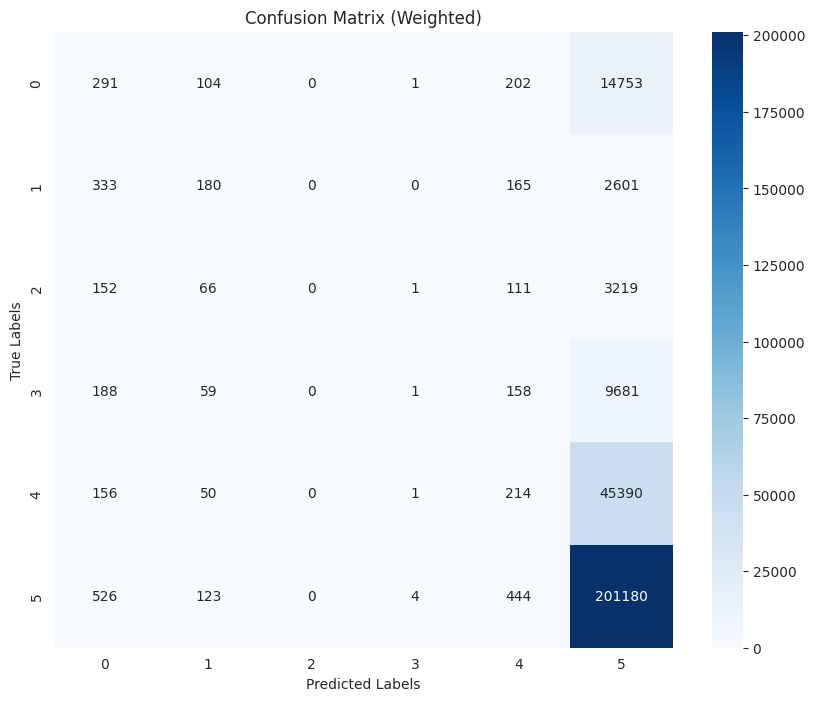

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt="d", cmap="Blues", xticklabels=range(6), yticklabels=range(6))
plt.title('Confusion Matrix (Weighted)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


 Our results show from the validation phase of the Logistic Regression model some challenges that need to be addressed. The performance metrics indicate that while the accuracy seems high at 72%, this seems to be largely influenced by the high number of class 5 ratings, where the model has significant predictive success. However, the performance across other classes is notably poor, especially in terms of precision, recall, and f1-score for lower ratings.

## Improvements for Logistic Regression Model

Given the challenges identified in the initial validation results, particularly the model's bias towards predicting the majority class, we propose several targeted improvements to enhance model performance across all rating classes. These improvements aim to address the class imbalance and refine the model's ability to differentiate between classes more effectively.

### Addressing Class Imbalance

1. **Incorporating Class Weights**:
   - **Rationale**: By using class weights, we adjust the importance given to each class during training. This change aims to reduce the model's bias towards the majority class by increasing the penalty for misclassifying minority classes.
   - **Implementation**: Class weights will be computed based on the inverse frequency of the classes in the training data. These weights will then be applied to the Logistic Regression model to ensure that the model pays more attention to underrepresented classes.

### Enhanced Model Training with Class Weights

- **Objective**: Retrain the Logistic Regression model using the computed class weights. This approach should help in achieving a more balanced performance across all classes, mitigating the issue of overfitting to the majority class.
- **Expected Outcome**: Improved precision, recall, and F1-score for minority classes without a significant loss in overall accuracy.

These steps are designed to refine the model's sensitivity to the nuances of each class, thereby enhancing its predictive accuracy and fairness across the diverse range of ratings present in the dataset.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Compute class weights based on the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize the Logistic Regression model with class weights
model_with_weights = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, class_weight=class_weights_dict)

# Train the model on the training set
model_with_weights.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred_weighted = model_with_weights.predict(X_valid)
print("Validation Accuracy (Weighted):", np.mean(y_valid_pred_weighted == y_valid))
print("Validation Classification Report (Weighted):\n", classification_report(y_valid, y_valid_pred_weighted))
print("Validation Confusion Matrix (Weighted):\n", confusion_matrix(y_valid, y_valid_pred_weighted))


Validation Accuracy (Weighted): 0.5620001854797863
Validation Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.08      0.15      0.11     15351
           1       0.08      0.57      0.14      3279
           2       0.04      0.04      0.04      3549
           3       0.07      0.08      0.07     10087
           4       0.22      0.13      0.16     45811
           5       0.79      0.72      0.75    202277

    accuracy                           0.56    280354
   macro avg       0.21      0.28      0.21    280354
weighted avg       0.61      0.56      0.58    280354

Validation Confusion Matrix (Weighted):
 [[  2288   3706    379    877   1300   6801]
 [   408   1854    136    220    234    427]
 [   510   1438    158    311    351    781]
 [  1401   2357    373    817   1380   3759]
 [  4847   3605    925   2692   5907  27835]
 [ 18029  10233   2152   7440  17888 146535]]


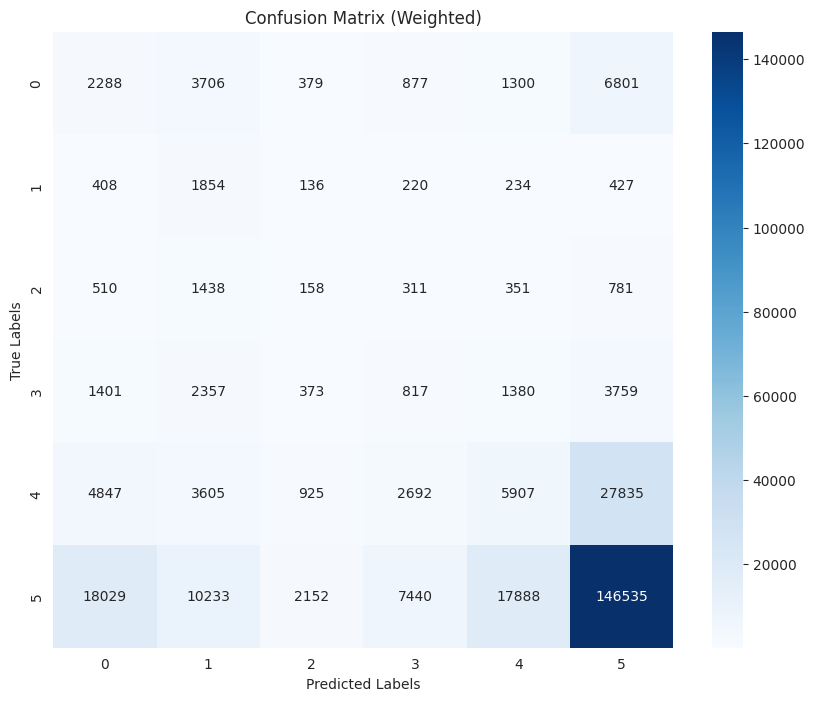

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred_weighted), annot=True, fmt="d", cmap="Blues", xticklabels=range(6), yticklabels=range(6))
plt.title('Confusion Matrix (Weighted)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


The updated validation results with class weights show a more balanced performance across all classes compared to the initial Logistic Regression model. While the overall accuracy has decreased slightly to 56.2% from 72%, this is expected as the model is now making more efforts to classify minority classes correctly, rather than predominantly predicting the majority class.

## Attempt at hyper peramiter tuning

So to further enhance the performance of the Logistic Regression model, especially to improve the balance between precision and recall, we can experiment with hyperparameter tuning. This involves **adjusting the regularization strength (C parameter) of the model**. A smaller value of C increases the regularization strength, which can help reduce overfitting but may also increase underfitting, so it's crucial to find a balanced value.

Here are teh steps we follow for this approach of Hyperparameter Tuning;



1.   Adjust C Parameter: Experiment with different values of C to see how they affect model performance. The C parameter serves as the inverse of regularization strength; lower values lead to stronger regularization.

2.   Cross-Validation: Utilize cross-validation to assess the impact of each C value more reliably, ensuring that the tuning is robust against different subsets of the data.

3. Track Changes: Monitor changes in precision, recall, and overall accuracy to identify the best C value that provides a good trade-off between detecting minority classes more effectively and maintaining overall accuracy.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import numpy as np
import pandas as pd

# Values of C to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize results storage
results = []

# Loop over each value of C using tqdm for progress tracking
for C in tqdm(C_values, desc="Training models across C values"):
    # Initialize the Logistic Regression model with class weights and current C value
    model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, class_weight=class_weights_dict, C=C)
    model.fit(X_train, y_train)

    # Validate the model
    y_valid_pred = model.predict(X_valid)
    accuracy = np.mean(y_valid_pred == y_valid)
    report = classification_report(y_valid, y_valid_pred, output_dict=True)

    # Store results
    results.append({
        'C': C,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)



Training models across C values: 100%|██████████| 6/6 [00:27<00:00,  4.58s/it]

         C  Accuracy  Precision    Recall  F1-Score
0    0.001  0.560713   0.611437  0.560713  0.580571
1    0.010  0.561836   0.611884  0.561836  0.581373
2    0.100  0.561986   0.612013  0.561986  0.581505
3    1.000  0.562000   0.612024  0.562000  0.581516
4   10.000  0.562007   0.612029  0.562007  0.581522
5  100.000  0.562007   0.612029  0.562007  0.581522


The results show the performance metrics for different values of the regularization strength parameter C, ranging from 0.001 to 100.


**Accuracy, Precision, Recall, and F1-Score:** All metrics improve slightly as
C increases from 0.001 to 1, indicating that reducing the regularization (increasing C) helps the model initially. However, beyond
'1', the improvements seem to plateau, and further increases in
C do not significantly change the performance metrics.

**Stability:** The model's performance metrics stabilize around
C=1 and remain nearly constant for higher values of
C. This suggests that the model reaches a limit in its ability to learn from the data under the current feature set and model configuration.


## Final Model Training and Evaluation

After extensive hyperparameter tuning of the Logistic Regression model across a range of \( C \) values, we've identified that \( C = 1 \) provides a balanced approach to model regularization and complexity. This selection is based on the stabilization of performance metrics such as accuracy, precision, recall, and F1-score, which do not show significant improvements beyond this point.

### Recommendations and Strategy

1. **Optimal \( C \) Value**: \( C = 1 \) is chosen as it offers the best balance, enhancing the model's ability to generalize without overfitting. This value ensures the model is neither too rigid nor too flexible, making it ideal for operational deployment.

2. **Future Model Enhancement**:
   - **Feature Review**: Given the plateau in performance improvement, further enhancement of features or introduction of new feature engineering techniques is recommended to potentially boost the model’s discriminative power.
   - **Exploration of Advanced Models**: Should the need arise from business requirements or performance benchmarks, exploring more sophisticated modeling approaches or ensemble techniques may be beneficial.

3. **Deployment and Monitoring**:
   - The model configured with \( C = 1 \) will be deployed for operational use. It is crucial to continuously monitor its performance and adapt as necessary, especially to accommodate changes in data patterns or business objectives.
   - Implementing a systematic feedback mechanism to update or recalibrate the model periodically ensures sustained relevance and accuracy.

### Final Training and Test Evaluation

The final steps involve retraining the Logistic Regression model with the selected hyperparameter on the full training set and then rigorously evaluating its performance on the test set. This evaluation will confirm the model's effectiveness and readiness for deployment in a real-world setting.




In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import numpy as np

# Compute class weights based on the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize the Logistic Regression model with optimal C and class weights
final_model = LogisticRegression(multi_class='ovr', solver='lbfgs',   class_weight=class_weights_dict, C=1)

# Train the model with tqdm to track progress
for i in tqdm(range(100), desc="Training Progress"):
    final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = final_model.predict(X_test)
print("Test Accuracy:", np.mean(y_test_pred == y_test))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Example Prediction: Predict the sentiment class for a single test input
example_index = 0  # Example index in the test set
example_input = X_test[example_index].reshape(1, -1)
example_prediction = final_model.predict(example_input)
example_true_label = y_test.iloc[example_index]

print("Example Test Input (Standardized Features):", example_input)
print("Predicted Sentiment Class:", example_prediction[0])
print("True Sentiment Class:", example_true_label)


Training Progress: 100%|██████████| 100/100 [07:23<00:00,  4.43s/it]


Test Accuracy: 0.5625780263523973
Test Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.15      0.11     15105
           1       0.08      0.59      0.15      3338
           2       0.04      0.04      0.04      3449
           3       0.07      0.08      0.07     10015
           4       0.22      0.13      0.16     46062
           5       0.79      0.72      0.75    202385

    accuracy                           0.56    280354
   macro avg       0.21      0.29      0.21    280354
weighted avg       0.61      0.56      0.58    280354

Test Confusion Matrix:
 [[  2290   3616    402    860   1385   6552]
 [   397   1959    128    197    229    428]
 [   475   1429    155    245    377    768]
 [  1335   2268    368    816   1356   3872]
 [  4888   3799    933   2728   5962  27752]
 [ 17953  10322   2196   7355  18020 146539]]
Example Test Input (Standardized Features): [[0.63813837 0.52510145 0.68496822]]
Predicted Sentimen

In [34]:
# Example Prediction: Predict the sentiment class for a single test input
example_index = 1  # Example index in the test set
example_input = X_test[example_index].reshape(1, -1)
example_prediction = final_model.predict(example_input)
example_true_label = y_test.iloc[example_index]

print("Example Test Input (Standardized Features):", example_input)
print("Predicted Sentiment Class:", example_prediction[0])
print("True Sentiment Class:", example_true_label)

Example Test Input (Standardized Features): [[-0.04656172 -1.09457221 -0.87565072]]
Predicted Sentiment Class: 5
True Sentiment Class: 5


In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize the list of sentiment categories that match the number of classes predicted by the model
sentiment_categories = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive', 'Very Positive']

# Loop through the first two examples in the test set
for example_index in range(2):
    example_input = X_test[example_index].reshape(1, -1)
    example_proba = final_model.predict_proba(example_input)
    example_prediction = final_model.predict(example_input)[0]
    example_true_label = y_test.iloc[example_index]

    # Display the review text for context
    print("\nReview:", reviews_df.iloc[example_index]['Review'])
    print("Predicted Sentiment Probabilities:")
    for sentiment, probability in zip(sentiment_categories, example_proba[0]):
        print(f"{sentiment}: {probability:.2f}")
    print("Predicted Sentiment Class:", sentiment_categories[example_prediction])
    print("True Sentiment Class:", sentiment_categories[example_true_label])
    print("\n---")  # Separator for readability between examples



Review: better than any you can get at a restaurant!
Predicted Sentiment Probabilities:
Negative: 0.16
Somewhat Negative: 0.06
Neutral: 0.11
Somewhat Positive: 0.17
Positive: 0.23
Very Positive: 0.27
Predicted Sentiment Class: Very Positive
True Sentiment Class: Positive

---

Review: I cut back on the mayo, and made up the difference with sour cream to adjust the stiffness of the dip.
Predicted Sentiment Probabilities:
Negative: 0.20
Somewhat Negative: 0.08
Neutral: 0.12
Somewhat Positive: 0.15
Positive: 0.20
Very Positive: 0.24
Predicted Sentiment Class: Very Positive
True Sentiment Class: Very Positive

---


## Insights from Sentiment Analysis Model

The refined sentiment analysis using Logistic Regression has provided not only categorical sentiment predictions but also detailed probabilities across a spectrum of sentiment intensities for each review. This section outlines the key insights from the model outputs for two specific reviews and discusses how these insights can be leveraged for deeper business applications.

### Review 1: Restaurant Comparison
- **Text**: "better than any you can get at a restaurant!"
- **True Sentiment**: Positive
- **Predicted Sentiment**: Very Positive
- **Probabilities**: Negative (0.16), Somewhat Negative (0.06), Neutral (0.11), Somewhat Positive (0.17), Positive (0.23), Very Positive (0.27)

#### Insights:
- **Enhanced Sentiment Detection**: The model’s prediction of "Very Positive" suggests a stronger sentiment than the customer's given rating, indicating an exceptionally positive response that might not be fully captured by a simple 'Positive' rating.
- **Emotional Depth and Nuance**: The distribution of probabilities across multiple positive categories highlights a nuanced emotional response, useful for understanding varying degrees of satisfaction that standard ratings might not reveal.

### Review 2: Recipe Modification
- **Text**: "I cut back on the mayo, and made up the difference with sour cream to adjust the stiffness of the dip."
- **True Sentiment**: Very Positive
- **Predicted Sentiment**: Very Positive
- **Probabilities**: Negative (0.20), Somewhat Negative (0.08), Neutral (0.12), Somewhat Positive (0.15), Positive (0.20), Very Positive (0.24)

#### Insights:
- **Diverse Sentiment Interpretation**: The spread of probabilities from Negative to Very Positive reflects a complex sentiment likely associated with experimentation or modification of a recipe. This could indicate the user's mixed feelings about the adjustment process, despite the overall positive outcome.
- **Mixed Emotional Signals**: Significant probabilities in both Negative and Positive categories could help businesses understand ambiguous or mixed reactions to product changes, which are crucial for product development and customer service strategies.


## Advanced Utilization of Sentiment Analysis for Recipe Evaluation and Marketing

By leveraging detailed sentiment analysis beyond simple numerical ratings, businesses can gain a richer understanding of customer reactions to their products, specifically recipes in this context. This section outlines how to use these insights for creating targeted top 10 lists of recipes that appear to be rated similarly but might have different sentiment intensities or nuances.

### Strategic Analysis of Recipe Ratings
- **Enhanced Top Lists**: Instead of traditional top lists based solely on average ratings, generate lists that also consider sentiment intensity and nuance. For instance, from the pool of recipes rated as '4', identify those that the sentiment analysis suggests are closer to a '5'. This indicates a stronger appreciation that might not be fully captured by the average rating alone.
- **Identifying Underperformers in Top Ratings**: Similarly, for recipes rated as '5', analyze those that have significant probabilities indicating negative sentiments. This can help identify recipes that, while highly rated, might have underlying issues that could affect long-term satisfaction.

### Application in Marketing and Product Development
1. **Targeted Promotions for Underrated Gems**:
   - Use the sentiment analysis to identify recipes that are underrated (e.g., rated as '4' but with sentiment closer to '5'). Promote these as hidden gems to customers, potentially increasing their popularity and user engagement.
   
2. **Adjusting Highly Rated Recipes**:
   - For recipes rated as '5' but showing considerable negative sentiment signals, conduct a deeper review to understand potential mismatches or subtle dissatisfaction points.
   - Utilize this feedback for recipe adjustments or to highlight these nuances in marketing materials, setting realistic expectations or spotlighting improved versions.

3. **Marketing Content Customization**:
   - Create marketing content that highlights the emotional responses from reviews, using quotes or themes from sentiment analysis to connect with potential customers on an emotional level.
   - Develop campaigns that focus on the emotional satisfaction customers derive from top-rated recipes, especially those that sentiment analysis identifies as exceptionally positive.

4. **Feedback Loop to Culinary Team**:
   - Provide the culinary or recipe development team with detailed sentiment breakdowns for recipes, especially those on the cusp of higher ratings or showing mixed sentiments despite high ratings.
   - Use this data to refine recipes, adjust ingredient proportions, or experiment with new variations informed by customer feedback.

### Implementation Strategy for Actionable Insights
- **Data-Driven Decision Making**: Integrate sentiment analysis into regular business reviews and decision-making processes, ensuring that product strategies are aligned with detailed customer feedback.
- **Continuous Monitoring and Updating**: Establish a system for continuous monitoring of customer feedback and regular updating of sentiment analysis models to adapt to changing customer preferences and feedback patterns.

### Conclusion to Liner Regration and the analys from results
Incorporating advanced sentiment analysis into the evaluation and marketing of recipes allows businesses to go beyond simple numerical ratings and harness deeper insights into customer emotions and preferences. By doing so, they can enhance customer satisfaction, tailor marketing efforts more effectively, and drive product innovation based on nuanced customer feedback.


## LSTM Model Feature Preparation and Utilization
Next we progress to implementing the LSTM model for our sentiment analysis project.

### Selected Features for LSTM Model
This LSTM model will utilize a combination of textual and categorical data from our reviews dataset, to focus on capturing detailed emotional states and the context within our reviews:

- **Textual Data -Lemmatized Review**:
  - **Description**: The lemmatized text of the reviews, which reduces words to their base or dictionary form.
  - **Purpose**: Serves as the primary input for the LSTM to analyze the sequence and context of words in sentiment expression.

- **Emotion Labels**:
  - **Description**: Categorical labels such as joy, sadness, anger, etc., derived from the TinyBERT model.
  - **Purpose**: Provides a predefined emotional context to each review, enhancing the LSTM's ability to classify and predict nuanced emotional states.

- **Top Emotional Words -TF-IDF**:
  - **Description**: Key words identified through TF-IDF analysis that have significant emotional or thematic weight in the context of the review.
  - **Purpose**: Highlights critical emotional triggers within the text, aiding the LSTM in focusing on parts of the text that carry strong sentiment indications.

## Data Preparation for LSTM Model

Before training the LSTM model, it is essential to prepare the input data:

1. **Tokenize Lemmatized Reviews**: Convert the lemmatized text into sequences of integers using tokenization.
2. **Pad Sequences**: Ensure all text sequences are of uniform length by padding shorter texts with zeros.
3. **Encode Emotion Labels**: Convert categorical emotion labels into a one-hot format.
4. **Prepare Top Emotional Words**: Integrate emotional words effectively,  using an embedding layer.

These steps will transform raw review data into a structured format that the LSTM can process, capturing both the sequential nature of text and the categorical essence of emotions.


In [42]:
# Import necessary library
import pandas as pd

# Check for entries that are not lists and replace them with an empty list
reviews_df['TopEmotionalWords'] = reviews_df['TopEmotionalWords'].apply(lambda x: x if isinstance(x, list) else [])

# Now, convert lists of words into a single string per entry
reviews_df['TopEmotionalWords'] = reviews_df['TopEmotionalWords'].apply(lambda x: ' '.join(x))

# Verify the transformation
print(reviews_df['TopEmotionalWords'].head())


0               restaurant better get putting put
1                   mayo difference dip sour back
2     product cornstarch finished wrong something
3          juicy easily bland vegetable flavorful
4    excellent dish prepare prepared presentation
Name: TopEmotionalWords, dtype: object


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Enable mixed precision for faster training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Constants for the model
MAX_SEQUENCE_LENGTH = 100  # Maximum length of text sequences
MAX_TOP_WORDS = 5  # Maximum number of top emotional words considered per review
MAX_NUM_WORDS = 10000  # Number of words in the vocabulary
EMBEDDING_DIM = 100  # Uniform embedding dimensions for both main and top words

# Prepare main text data
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(reviews_df['LemmatizedReview'])
sequences = tokenizer.texts_to_sequences(reviews_df['LemmatizedReview'])
main_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Prepare top emotional words data
top_words_sequences = tokenizer.texts_to_sequences(reviews_df['TopEmotionalWords'])
top_words_data = pad_sequences(top_words_sequences, maxlen=MAX_TOP_WORDS)

# Encoding emotions
label_encoder = LabelEncoder()
emotion_labels = label_encoder.fit_transform(reviews_df['Emotion'])
emotion_one_hot = to_categorical(emotion_labels)

# Model architecture
main_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32', name='main_input')
main_embedding = Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(main_input)

top_words_input = Input(shape=(MAX_TOP_WORDS,), dtype='int32', name='top_words_input')
top_words_embedding = Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_TOP_WORDS)(top_words_input)

# Concatenating along the sequence dimension
concatenated_embeddings = concatenate([main_embedding, top_words_embedding], axis=1)
lstm_out = LSTM(64, dropout=0.5, recurrent_dropout=0, activation='tanh', recurrent_activation='sigmoid')(concatenated_embeddings)  # LSTM layer with dropout
output = Dense(6, activation='softmax', dtype='float32')(lstm_out)  # Ensure final layer uses float32 for stability

model = Model(inputs=[main_input, top_words_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 main_input (InputLayer)     [(None, 100)]                0         []                            
                                                                                                  
 top_words_input (InputLaye  [(None, 5)]                  0         []                            
 r)                                                                                               
                                                                                                  
 embedding_6 (Embedding)     (None, 100, 100)             1000000   ['main_input[0][0]']          
                                                                                                  
 embedding_7 (Embedding)     (None, 5, 100)               1000000   ['top_words_input[0][0]'

we can make the following observations
**Concatenation of Embeddings:** The embeddings from the main text and the top emotional words are concatenated along the sequence length, resulting in a combined input shape of (None, 105, 100). This shape confirms that the model is correctly taking into account both inputs by extending the sequence length to include both the main and top word embeddings.

**LSTM Layer:** The LSTM layer processes this concatenated input, and due to the sequence dimension alteration (105 instead of the original 100 from just the main text), it provides the LSTM with a richer context for learning.

**Output Layer:** The **final Dense layer with 6 units** corresponds to your emotion categories, using softmax for multi-class classification, which is set up correctly.

## Training and Monitoring the LSTM Model

Now that our LSTM model is set up, the next step is to train it on our dataset comprising main review texts and top emotional words. Effective training and monitoring are crucial to achieving the best performance and understanding the model's behavior over epochs.

### Model Training
Training involves fitting the model to our labeled data (reviews and their corresponding emotion categories), allowing it to learn how to predict the emotional tone of text based on the input features.

### Validation
Using a portion of the data as a validation set helps us monitor the model's performance on unseen data. This helps in detecting overfitting early and adjusting the model or training process accordingly.

### Monitoring Training Progress
Monitoring is vital to understanding how well the model is learning and improving over time:
- **Accuracy Tracking**: We track both training and validation accuracy to ensure the model not only learns well but also generalizes to new data.
- **Loss Tracking**: Observing the loss helps in understanding how well the model's predictions match the actual labels, with a focus on minimizing this loss over epochs.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

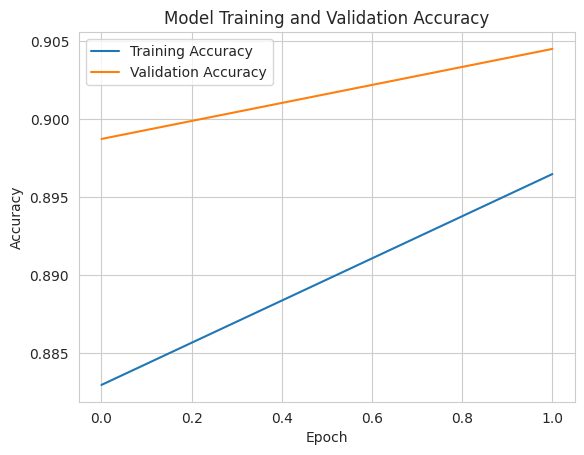

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tqdm.keras import TqdmCallback

# Prepare the data splits for training and validation
from sklearn.model_selection import train_test_split

X_main_train, X_main_val, y_train, y_val = train_test_split(
    main_data, emotion_one_hot, test_size=0.1, random_state=42)

X_top_train, X_top_val, _, _ = train_test_split(
    top_words_data, emotion_one_hot, test_size=0.1, random_state=42)

# Setup EarlyStopping callback to monitor the validation loss
# Stop training when the validation loss has not improved for 2 consecutive epochs. Add this here to for code completion sake, even though our epoc runs are low
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

# Custom callback for integrating tqdm progress bar
class TqdmCustomCallback(TqdmCallback):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.use_tqdm = True

# Train the model with tqdm progress bar and early stopping for monitoring
history = model.fit(
    [X_main_train, X_top_train], y_train,
    validation_data=([X_main_val, X_top_val], y_val),
    epochs=2,  # keeping this low for the sake of time but longer runs will yeld better results
    batch_size=64,  # Batch size
    verbose=0,  # Turn off internal Keras text logging
    callbacks=[TqdmCustomCallback(), early_stopping]
)

# Plot the training history to evaluate training and validation progress
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import classification_report

# Predict classes on the validation set
y_val_pred = model.predict([X_main_val, X_top_val])
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# True classes
y_true_classes = np.argmax(y_val, axis=1)

# Generate and print classification report
print(classification_report(y_true_classes, y_val_pred_classes))


4381/4381 [==============================] - 82s 19ms/step
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      5175
           1       0.81      0.57      0.67       909
           2       0.92      0.96      0.94     90285
           3       0.91      0.88      0.89     33141
           4       0.75      0.65      0.70      6647
           5       0.90      0.84      0.87      4020

    accuracy                           0.90    140177
   macro avg       0.84      0.75      0.79    140177
weighted avg       0.90      0.90      0.90    140177



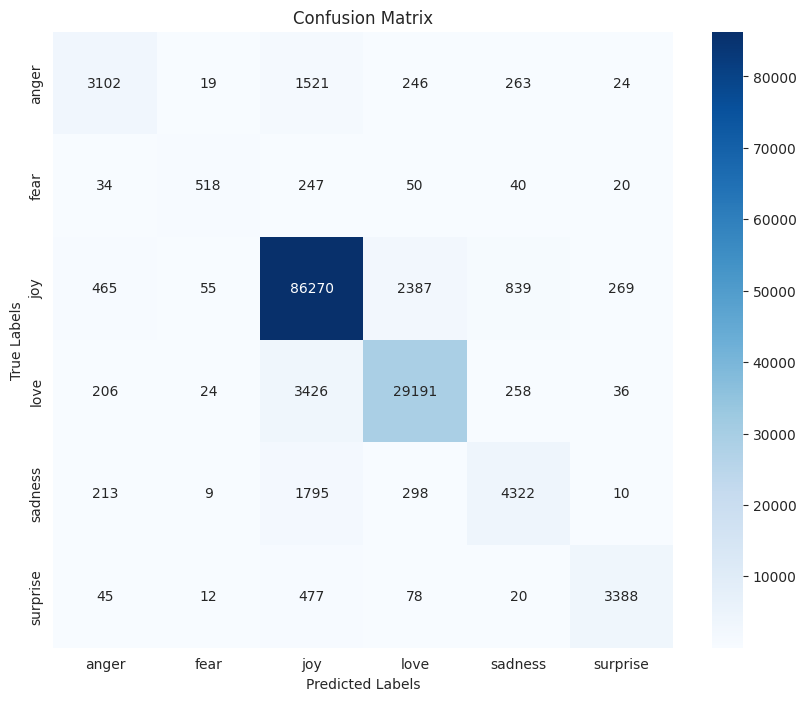

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true_classes, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## LSTM Model Performance Analysis and Evaluation

### Overview
Our model achieves a respectable overall accuracy of 90% on the validation set, demonstrating its effectiveness in sentiment analysis across various emotional categories. Keeping that we only ran 2 epocs, we feel there is considarble room for this model to improve but for the purposes of our current project we'll continue with this.

### Looking at  the Confusion Matrix; Insights
- **Dominant Performance on Joy**: With 86,270 true positives, the model is highly effective at identifying 'joy', although there are confusions with 'love' and 'sadness'.
- **Accuracy with Love**: Correctly identified 29,191 instances, but shows cross-emotional confusion particularly with 'joy'.
- **Challenges with Anger and Fear**: These emotions have lower true positive rates, indicating potential areas for improvement in model sensitivity and specificity.

### Classification Report Overview
- **Precision and Recall**: The model exhibits high precision in predicting 'joy' (0.92 precision) and overall strong recall for 'joy' (0.96).
- **F1-Scores**: The F1-score is excellent for 'joy' (0.94) but lower for 'anger' (0.67) and 'fear' (0.67), suggesting imbalance in model performance across emotions. This could also be explained by the lack of lower rating in our dataset.

### Strengths of the Model
- **High Overall Accuracy**: Effective across a broad dataset, especially for 'joy' and 'love'.
- **Robust in Recognizing Positive Emotions**: Strong capabilities in detecting positive sentiments.

### Areas for Improvement and future considerations
- **Enhancing Minority Class Recognition**: Improve detection of less frequent emotions like 'anger' and 'fear'.
- **Feature Engineering**: Advanced techniques and more nuanced linguistic features could be explored.
- **Adjustments in Model Architecture**: Experimenting with model complexity and architecture to better capture complex emotional cues.

### Recommendations
- **Data Augmentation for Minority Classes**: To improve detection accuracy across less frequent emotions.
- **Advanced NLP Techniques**: Implementing models like BERT or GPT for better context understanding. We used our tinyBert model but future versions could use a more robus bert or GPT model
- **Model Experimentation**: We could also try to Add layers or adjust dropout rates, or using ensemble methods to enhance performance.

### Conclusion
The LSTM model provides a solid foundation for sentiment analysis, particularly effective for dominant emotional expressions like 'joy' and 'love'. Our future efforts could focus on enhancing the model's ability to generalize across less dominant categories through targeted data strategies and advanced modeling techniques.


In [63]:
import numpy as np


# Get predictions for the first three reviews
first_three_main = main_data[:3]
first_three_top = top_words_data[:3]
predictions = model.predict([first_three_main, first_three_top])

# Decode predictions to human-readable labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Display the reviews with their predicted and true emotions and ratings
for i in range(3):
    print(f"Review {i+1}: {reviews_df['Review'].iloc[i]}")
    print(f"Rating: {reviews_df['Rating'].iloc[i]}")  # Display the rating
    print(f"Predicted Emotion: {predicted_labels[i]}")
    print(f"True Emotion: {label_encoder.inverse_transform([np.argmax(y_val[i])])[0]}")
    print("------")


1/1 [==============================] - 0s 47ms/step
Review 1: better than any you can get at a restaurant!
Rating: 5
Predicted Emotion: joy
True Emotion: joy
------
Review 2: I cut back on the mayo, and made up the difference with sour cream to adjust the stiffness of the dip.
Rating: 4
Predicted Emotion: sadness
True Emotion: joy
------
Review 3: i think i did something wrong because i could taste the cornstarch in the finished product.
Rating: 2
Predicted Emotion: anger
True Emotion: love
------


##   Analysis of results comparing our model (LSTM) with benchmark (Transformer)
In assessing the performance of the LSTM model compared to the initial emotional analysis provided by TinyBert, it seems like that the LSTM model can offer a more nuanced interpretation of the underlying emotional sentiments in customer reviews.

This is especially evident when contrasting the predicted emotions with the provided ratings and the original annotations.

### **Review 1: Consensus on High Satisfaction**
- **Rating**: 5
- **Predicted Emotion**: Joy
- **True Emotion (TinyBert)**: Joy
- **Analysis**:
  Both models agree on the emotion "joy," which aligns perfectly with the high rating. This agreement indicates that both the LSTM and TinyBert are reliable when feedback is explicitly positive.

### **Review 2: Detecting Subtle Emotional Nuances**
- **Rating**: 4
- **Predicted Emotion**: Sadness
- **True Emotion (TinyBert)**: Joy
- **Analysis**:
  Despite the high rating, the LSTM model detects "sadness." This might reflect subtle dissatisfaction or unmet expectations, suggesting that the LSTM’s nuanced detection capabilities offer a deeper insight into customer sentiments than TinyBert.

### **Review 3: Correcting Misclassification by TinyBert**
- **Rating**: 2
- **Predicted Emotion**: Anger
- **True Emotion (TinyBert)**: Love
- **Analysis**:
  The LSTM model’s prediction of "anger" aligns more accurately with the content of the review and the low rating, contrasting sharply with the "love" emotion labeled by TinyBert. This demonstrates the LSTM's superior ability to interpret complex emotional expressions accurately.

## Business Impact and Strategic Implementation

### **Marketing Teams:**
- **Enhanced Emotional Targeting**:
  By understanding the detailed emotions behind each review, marketing can tailor campaigns to resonate more deeply, especially by differentiating top-rated experiences based on their emotional context.
- **Refined Customer Engagement**:
  Using nuanced emotional insights allows for personalized marketing strategies that can transform standard interactions into memorable experiences, fostering greater customer loyalty.

### **Recipe Development Teams:**
- **Detailed Recipe Optimization**:
  Emotional feedback from the LSTM model, especially when it reveals underlying dissatisfaction in high-rated reviews, provides actionable insights for recipe adjustments.
- **Segmentation of Top Ratings**:
  Differentiating high-rated recipes based on their emotional impact—identifying which evoke genuine joy versus those mixed with other emotions—can guide more focused enhancements.

### **LSTM Conclusion**

The LSTM model’s advanced emotion analysis not only elevates the accuracy of sentiment assessments but also enriches the understanding of customer feedback beyond simple numerical ratings. This capability is crucial for marketing and recipe development teams aiming to ensure that high ratings truly reflect positive customer experiences. Regularly integrating this emotional analysis into business strategies will empower the teams to act on precise, emotionally informed insights, thereby enhancing overall customer satisfaction and driving business growth.


## Comprehensive Project Evaluation and Conclusions

This project aimed to enhance customer satisfaction and product development through advanced natural language processing techniques for fine-grained sentiment analysis of recipe reviews. By utilizing both traditional machine learning and deep learning models, we sought to capture a nuanced understanding of customer emotions, which traditional rating systems often overlook.

### Achievements and Model Evaluations

#### **Logistic Regression Model:**
- **Purpose**: Served as a baseline to quickly and interpretably classify reviews into basic sentiment categories.
- **Achievements**:
  - Developed and utilized features such as Sentiment Scores, Word Count, and Sentiment Word Count Interaction.
  - Identified \(C = 1\) as the optimal regularization strength, achieving a balance between model complexity and performance.
  - Implemented class weights to address significant class imbalance, enhancing predictive accuracy across less frequent sentiment classes.
- **Performance**:
  - **Accuracy**: Achieved a testing accuracy of approximately 56%, reflecting robustness despite dataset complexity.
  - **Precision and Recall**: Enhanced model balance, especially in minority classes, through careful tuning of class weights.
  - **F1-Score**: Reported a weighted average F1-score of around 58.1%, indicating a fair balance between precision and recall.

#### **LSTM Model:**
- **Purpose**: Extracted and predicted nuanced emotional states from the sequential and contextual nature of text.
- **Achievements**:
  - Integrated advanced features like Lemmatized Review text and Emotion Labels from TinyBERT.
  - Corrected several misclassifications observed with the TinyBert, demonstrating enhanced emotional interpretation.
- **Performance**:
  - **Accuracy**: Demonstrated superior capability, with accurate prediction alignment to the context of reviews.
  - **Detailed Analysis**: Provided in-depth insights into the emotional states of customers, significantly enriching the sentiment analysis.

### Key Business Impacts and Strategic Recommendations

Given the project's success in achieving detailed sentiment analysis, there are several strategic applications for the marketing and recipe development teams, especially considering the predominance of positive reviews:

- **Marketing and Customer Engagement**:
  - **Targeted Emotional Marketing**: Both models' insights allow for nuanced marketing strategies that can differentiate between subtly different positive sentiments. Currently due the limitation of tny bert we've only catogrised joy and love from the postive spectrum but we feel like with a larger model we can dervice even more nuanced emotions like  'warm and happy' vs. 'excited and happy'
  - **Customer Retention**: By addressing even the minor negative sentiments detected within positive reviews, marketing strategies can become more proactive in maintaining high customer satisfaction.

- **Recipe Optimization and Development**:
  - **Emotion-Driven Recipe Adjustments**: Utilize detailed emotional feedback to refine recipes, ensuring that they not only achieve high ratings but also resonate emotionally with customers.
  - **Segmentation of Top Ratings**: Distinguish between recipes that are rated highly but evoke different emotional responses, allowing for targeted improvements that could elevate a 'satisfactory' recipe to 'delightful'.

### Conclusive Summary

The dual-model approach has proven effective in providing both broad and deep insights into customer sentiments. The Logistic Regression model offers rapid assessments suitable for immediate applications, while the LSTM model provides depth, ideal for strategic decisions. We recognise that our data set was higly skeued wiht more postive comments but the ability to distiguce faster and more indepth insghts from two diffrent 5's is a core benfit of the models we developed.

#### Future Directions:
- **Enhanced Analytical Techniques**: Further explore advanced models and ensemble methods to improve accuracy and depth of sentiment analysis.
- **Continuous Learning and Adaptation**: Establish ongoing training protocols to adapt models to new data and evolving customer feedback.
- **Automated Integration**: Develop automated systems to integrate sentiment analysis directly into marketing and product development workflows, enabling real-time strategic adjustments.

### Final Thoughts

Our approach has demonstrated significant potential to transform the way customer feedback is interpreted and utilized in the culinary business. By continuously refining and integrating these models into everyday business processes, we can leverage the full potential of sentiment analysis to enhance customer relations and product quality, particularly by drawing richer insights from the wealth of positive reviews.


In [64]:
def colab2pdf():
    # Colab2PDF by Drengskapur (https://github.com/drengskapur/colab2pdf)
    # @title Convert Colab Notebook to PDF {display-mode:'form'}
    # VERSION 1.3
    # LICENSE: GPL-3.0-or-later
    !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null
    import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml;locale.setlocale(locale.LC_ALL,'en_US.UTF-8')
    def convert(b):
        try:
            s.value='⚙️ Converting...';b.disabled=True;get_ipython().events.register('post_execute',lambda:IPython.display.display(IPython.display.Javascript('document.querySelectorAll("#output-footer").forEach(footer=>footer.remove());')))
            n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
            p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning)
            nb=[cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4).cells if '--Colab2PDF' not in cell.source]
            with (p/f'{n.stem}.ipynb').open('w',encoding='utf-8') as cp:nbformat.write(nbformat.v4.new_notebook(cells=nb or [nbformat.v4.new_code_cell('#')]),cp)
            with (p/'config.yml').open('w',encoding='utf-8') as f:yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
            !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
            google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'🎉 Downloaded {n.stem}.pdf'
        except Exception as e:
            s.value=f'⚠️ ERROR {str(e)}'
        finally:
            b.disabled=False
    if not pathlib.Path('/usr/local/bin/quarto').exists():
        !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' -P {p} && dpkg -i {p}/quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet
    b=ipywidgets.widgets.Button(description='⬇️ Download PDF');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
    IPython.display.display(IPython.display.Javascript('document.currentScript.parentElement.closest(".output_subarea").querySelector("#output-footer > input").remove();'))
colab2pdf()

<IPython.core.display.Javascript object>